(8,)
-2.5 : 78
-1.75 : 1964
-1.0 : 3665
0.5 : 6977
1.25 : 4414
2.0 : 1061
2.75 : 192
3.5 : 20


Text(0.5, 0, 'Depths (relative index)')

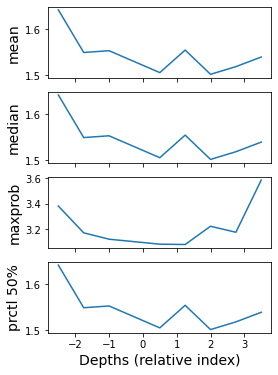

In [100]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
path  = '/Users/nicogravel/Documents/fMRI/project-00-7t-pipeline-dev/results/' 
fname = 'depths.npy'
depths = np.load(path + fname)
fname = 'concatenated_pRFs.npy'
pRFsizes = np.load(path + fname,allow_pickle=True)
print(pRFsizes.shape)
for n in range(8):
    print(str(depths[n]) + ' :',pRFsizes[n].size)
prctl = 90
kernel = "cos"    # "gau", biw", "cos", "epa", "triw"
bw = "scott"  # "scott", "normal_reference", "silverman"
adj = 2
sigmas = np.zeros((8,4))
score = ['mean','median','maxprob','prctl' + str(prctl) + '%']
for n in range(8):
    X = pRFsizes[n]
    dens = sm.nonparametric.KDEUnivariate(X)
    dens.fit(fft=False,kernel=kernel,bw=bw,adjust=adj) 
    sigmas[n,0] = np.mean(dens.support)
    sigmas[n,1] = np.median(dens.support)
    sigmas[n,2] = np.max(dens.support)
    sigmas[n,3] = np.percentile(dens.support,prctl)
fig, ax = plt.subplots(nrows=4, ncols=1,figsize=(4, 6))
for n in range(4):
    ax[n].plot(depths,sigmas[:,n])
    ax[n].set_ylabel(score[n], rotation=90, fontsize=14)
    if n !=3 :
        ax[n].set_xticklabels([])
ax[3].set_xlabel('Depths (relative index)', fontsize=14)
